<a href="https://colab.research.google.com/github/swflora/ML/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👀 다층 퍼셉트론 (MLP)

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/Generative_Deep_Learning_2nd_Edition/blob/main/notebooks/02_deeplearning/01_mlp/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

이 노트북에서는 CIFAR 데이터셋에서 다층 퍼셉트론을 훈련합니다.

In [1]:
import sys

# 코랩의 경우 깃허브 저장소로부터 utils.py를 다운로드 합니다.
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/rickiepark/Generative_Deep_Learning_2nd_Edition/main/notebooks/utils.py
    !mkdir -p notebooks
    !mv utils.py notebooks

--2024-03-05 01:17:25--  https://raw.githubusercontent.com/rickiepark/Generative_Deep_Learning_2nd_Edition/main/notebooks/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 771 [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]     771  --.-KB/s    in 0s      

2024-03-05 01:17:25 (38.5 MB/s) - ‘utils.py’ saved [771/771]



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

## 0. 파라미터 <a name="parameters"></a>

In [3]:
# 클래스를 10개로 분리
NUM_CLASSES = 10

## 1. 데이터 준비 <a name="prepare"></a>

In [4]:
# 로컬에서 데이터 불러오기
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
# 이미지 데이터 정규화 진행
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# y_train 데이터에 클래스 입력
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

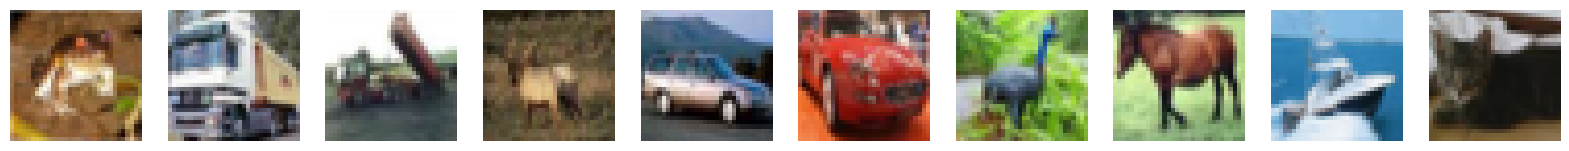

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [7]:
# 이미지 시각화
display(x_train[:10])
# 레이블 지정
print(y_train[:10])

## 2. 모델 구축 <a name="build"></a>

In [9]:
# 핵심_인공지능은 크게 3가지 파트로 나누어짐
# 1. Input, 2. hidden layer, 3. output

# 입력 층(input)
input_layer = layers.Input((32, 32, 3))

# hidden layer
x = layers.Flatten()(input_layer)
# 200 = 층(layer)의 개수, 규칙은 존재하지 않음(마음대로 층의 개수와 개채량을 정함)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

# 출력 층(output)
# dense별 총 계산한 개수 : 614,600개 / 30,150개 / 1,510개
output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. 모델 훈련 <a name="train"></a>

In [10]:
# Adam : 경사하강법 사용, 오차가 최소가 되는 기울기를 찾음
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [11]:
# epochs : 반복 횟수, batch_size = 데이터를 나눔
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8422 - accuracy: 0.3365
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6594 - accuracy: 0.4068
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5757 - accuracy: 0.4383
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5274 - accuracy: 0.4569
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4885 - accuracy: 0.4692
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4555 - accuracy: 0.4817
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4353 - accuracy: 0.4875
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4029 - accuracy: 0.5024
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3856 - accuracy: 0.5065
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.364

## 4. 평가 <a name="evaluate"></a>

In [12]:
# 정확도가 49.7%밖에 되지 않음
# 신경망의 등장 이유
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4254 - accuracy: 0.4977


[1.4254096746444702, 0.4977000057697296]

In [13]:
# 클래스 정의
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


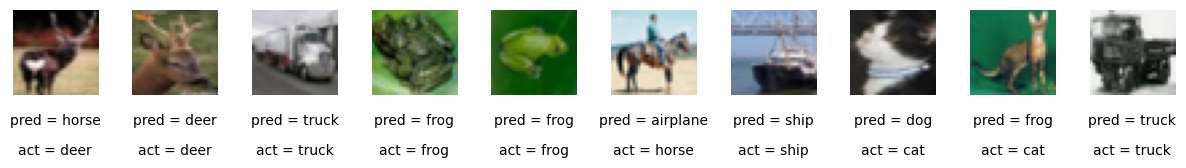

In [14]:
# 모델 예측
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

In [ ]:
# 지금까지 학습한 모델은 1970대 등장한 모델